In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import scale
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Random_Forest를 이용한 유방암 예측

## 데이터 정제

### 가져오기 및 수정

In [3]:
data = pd.read_csv("./유방암.csv", engine='python')
data.head()

,diagnosis,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
data.shape

(569, 31)

In [5]:
table = str.maketrans(' ', '_')
rename_dict = { col:col.lower().translate(table)  for col in data.columns}

data.rename(columns=rename_dict,inplace=True)
data.columns

Index(['diagnosis', 'mean_radius', 'mean_texture', 'mean_perimeter',
       'mean_area', 'mean_smoothness', 'mean_compactness', 'mean_concavity',
       'mean_concave_points', 'mean_symmetry', 'mean_fractal_dimension',
       'radius_error', 'texture_error', 'perimeter_error', 'area_error',
       'smoothness_error', 'compactness_error', 'concavity_error',
       'concave_points_error', 'symmetry_error', 'fractal_dimension_error',
       'worst_radius', 'worst_texture', 'worst_perimeter', 'worst_area',
       'worst_smoothness', 'worst_compactness', 'worst_concavity',
       'worst_concave_points', 'worst_symmetry', 'worst_fractal_dimension'],
      dtype='object')

## Train 데이터와 Test 데이터 분해

In [6]:
from sklearn.model_selection import train_test_split

df_y = data.diagnosis
df_x = data.drop("diagnosis",axis=1)

df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_x,df_y,test_size=0.3,random_state=1234)

print("train data X size: {}".format(df_train_x.shape))
print("train data Y size: {}".format(df_train_y.shape))
print("test data X size: {}".format(df_test_x.shape))
print("test data Y size: {}".format(df_test_y.shape))

train data X size: (398, 30)
train data Y size: (398,)
test data X size: (171, 30)
test data Y size: (171,)


## Random Forest

### 인자 변화에 따른 예측 변화 확인

#### 스케일 조정이 되지 않은 데이터

In [7]:
rf_uncustomized = RandomForestClassifier(random_state=1234)
rf_uncustomized.fit(df_train_x,df_train_y)

print("Accucary on training set: {:.3f}".format(rf_uncustomized.score(df_train_x,df_train_y)))
print("Accucary on test set: {:.3f}".format(rf_uncustomized.score(df_test_x,df_test_y)))

Accucary on training set: 0.997
Accucary on test set: 0.936


/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


#### 스케일 조정 후 데이터

In [8]:
df_train_x_scaled = scale(df_train_x,axis=0)
df_test_x_scaled = scale(df_test_x,axis=0)
pd.DataFrame(df_train_x_scaled,columns=df_train_x.columns).head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,-1.537538,-0.555548,-1.519860,-1.202355,0.513983,-0.567464,-1.120375,-1.249209,0.620657,1.172660,...,-1.276643,-0.472874,-1.300672,-1.011696,0.548118,-0.768557,-1.277839,-1.733444,-0.771425,0.221296
1,-0.796097,-0.386037,-0.813568,-0.734869,-0.560715,-0.965140,-0.771266,-0.716927,-0.810121,-0.513848,...,-0.680246,1.698160,-0.676490,-0.648918,0.518137,-0.580688,-0.447953,-0.430111,0.089705,-0.363035
2,0.217527,-0.386037,0.185577,0.051241,1.411902,0.489621,0.810195,0.936694,0.516330,-0.082614,...,0.458706,-0.692868,0.400268,0.150331,0.338256,-0.254325,0.259580,0.764436,0.808944,-0.675025
3,0.895158,0.888784,0.765950,0.771536,-0.698209,-0.781438,-0.757719,-0.530122,-0.947982,-1.376316,...,0.727913,0.919350,0.601808,0.588221,-0.394120,-0.662580,-0.722902,-0.499488,-0.760008,-1.004755
4,-0.880801,-0.490530,-0.864427,-0.828931,1.601307,0.049639,-0.610699,-0.167410,0.505152,2.422242,...,-0.961878,-0.803668,-0.942938,-0.844601,1.413263,-0.334411,-0.702280,-0.307839,-0.225064,1.689948


In [9]:
rf_scaled = RandomForestClassifier(random_state=1234)
rf_scaled.fit(df_train_x_scaled,df_train_y)

print("Accucary on training set: {:.3f}".format(rf_scaled.score(df_train_x_scaled,df_train_y)))
print("Accucary on test set: {:.3f}".format(rf_scaled.score(df_test_x_scaled,df_test_y)))

Accucary on training set: 0.997
Accucary on test set: 0.918


/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


##### 스케일 조정 후 예측률이 조금 낮아졌지만, 큰 의미가 있는 것으로 보이지 않는다!

### N_iter_tree 조정

In [12]:
n_iter_tree = 150
train_accuracy = []
test_accuracy = []

for n_tree in range(n_iter_tree):
    rf1 = RandomForestClassifier(n_estimators=n_tree+1,random_state=1234)
    rf1.fit(df_train_x_scaled,df_train_y)
    train_accuracy.append(rf1.score(df_train_x_scaled,df_train_y))
    test_accuracy.append(rf1.score(df_test_x_scaled,df_test_y))
    
df_accruacy1 = pd.DataFrame()
df_accruacy1["NumberOfTree"] = [n_tree +1 for n_tree in range(n_iter_tree)]
df_accruacy1["TrainAccuracy"] = train_accuracy
df_accruacy1["TestAccuracy"] = test_accuracy
df_accruacy1

,NumberOfTree,TrainAccuracy,TestAccuracy
0,1,0.969849,0.912281
1,2,0.977387,0.912281
2,3,0.997487,0.923977
3,4,0.994975,0.906433
4,5,1.000000,0.929825
5,6,0.994975,0.900585
6,7,1.000000,0.935673
7,8,1.000000,0.918129
8,9,1.000000,0.929825
9,10,0.997487,0.918129


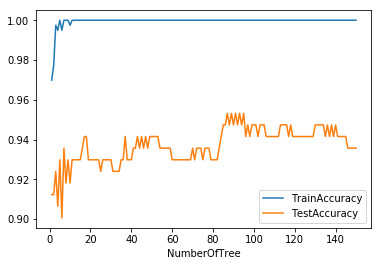

In [13]:
df_accruacy1.set_index("NumberOfTree", inplace=False).plot()

In [17]:
df_accruacy1.loc[df_accruacy1.TestAccuracy > 0.9532163742690050]

,NumberOfTree,TrainAccuracy,TestAccuracy
86,87,1.0,0.953216
88,89,1.0,0.953216
90,91,1.0,0.953216
92,93,1.0,0.953216
94,95,1.0,0.953216


##### N_iter_tree 가 증가 할 수록 Train의 예측률이 올랐으나, Test에서 큰 변화는 보이지 않고, 오히려 90이후 고점을 찍고 하향세를 보임
> **과적합!**  
> **최적값은 86,88,90,92,94**

### Criterion 변화

##### Gini 와 Entropy 일 때의 변화 확인

In [101]:
para_criterion = ['gini','entropy']
train_accuracy = []
test_accuracy = []

for criterion in para_criterion:
    rf2 = RandomForestClassifier(criterion=criterion,random_state=1234)
    rf2.fit(df_train_x_scaled,df_train_y)
    train_accuracy.append(rf2.score(df_train_x_scaled,df_train_y))
    test_accuracy.append(rf2.score(df_test_x_scaled,df_test_y))
    
df_accruacy2 = pd.DataFrame()
df_accruacy2["Criterion"] = para_criterion
df_accruacy2["TrainAccuracy"] = train_accuracy
df_accruacy2["TestAccuracy"] = test_accuracy
df_accruacy2

/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


,Criterion,TrainAccuracy,TestAccuracy
0,gini,0.997487,0.918129
1,entropy,1.000000,0.912281


##### Entropy는 Train 에서 Gini 보다 우수한 성능을 보이나, 실제  Test에서 더 낮은 성적을 기록함
> **과적합!**  
> **최적값은 Gini**

### Max_depth 변화

In [21]:
para_max_depth = [i+1 for i in range(30)] * 2
n_iter_depth = 30
para_criterion = ['gini']*n_iter_depth + ['entropy']*n_iter_depth
train_accuracy = []
test_accuracy = []

for criterion,depth in zip(para_criterion,para_max_depth):
    rf3 = RandomForestClassifier(criterion=criterion,max_depth=depth,random_state=1234)
    rf3.fit(df_train_x_scaled,df_train_y)
    train_accuracy.append(rf3.score(df_train_x_scaled,df_train_y))
    test_accuracy.append(rf3.score(df_test_x_scaled,df_test_y))
    
df_accruacy3 = pd.DataFrame()
df_accruacy3["Criterion"] = para_criterion
df_accruacy3["Depth"] = para_max_depth
df_accruacy3["TrainAccuracy"] = train_accuracy
df_accruacy3["TestAccuracy"] = test_accuracy
df_accruacy3

/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/pirl/anaconda3/lib/python3.7/site-packages/skl

/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/pirl/anaconda3/lib/python3.7/site-packages/skl

,Criterion,Depth,TrainAccuracy,TestAccuracy
0,gini,1,0.952261,0.900585
1,gini,2,0.969849,0.900585
2,gini,3,0.987437,0.894737
3,gini,4,0.997487,0.923977
4,gini,5,1.000000,0.912281
5,gini,6,0.997487,0.918129
6,gini,7,0.997487,0.918129
7,gini,8,0.997487,0.918129
8,gini,9,0.997487,0.918129
9,gini,10,0.997487,0.918129


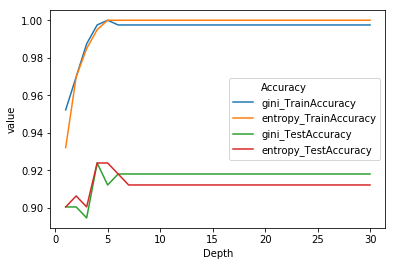

In [22]:
df_accruacy3_melt = pd.melt(df_accruacy3, id_vars=["Criterion","Depth"])
df_accruacy3_melt["Accuracy"] = df_accruacy3_melt["Criterion"] + "_" + df_accruacy3_melt["variable"]
sns.lineplot(x="Depth", y="value", hue="Accuracy", data=df_accruacy3_melt)

##### Depth 가 증가함으로 인해 Train 예측력은 올라가지만, 실제  Test의 결과는 4이후로 감소됨.
> **과적합!**  
> **최적값은 4**

### Min leaf size 조정

In [23]:
train_accuracy = []
test_accuracy = []

n_depth = 4
n_iter_min_leaf_size = 100

para_criterion = ['entropy']*n_iter_min_leaf_size
para_min_leaf_size = [i+1 for i in range(n_iter_min_leaf_size)]

for criterion,leafsize in zip(para_criterion,para_min_leaf_size):
    rf4 = RandomForestClassifier(criterion=criterion,max_depth=n_depth,min_samples_leaf= leafsize,random_state=1234)
    rf4.fit(df_train_x_scaled,df_train_y)
    train_accuracy.append(rf4.score(df_train_x_scaled,df_train_y))
    test_accuracy.append(rf4.score(df_test_x_scaled,df_test_y))
    
df_accruacy4 = pd.DataFrame()
df_accruacy4["Criterion"] = para_criterion
df_accruacy4["Depth"] = n_depth
df_accruacy4["MinLeafSize"] = para_min_leaf_size
df_accruacy4["TrainAccuracy"] = train_accuracy
df_accruacy4["TestAccuracy"] = test_accuracy
df_accruacy4

/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/pirl/anaconda3/lib/python3.7/site-packages/skl

/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/pirl/anaconda3/lib/python3.7/site-packages/skl

/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/pirl/anaconda3/lib/python3.7/site-packages/skl

,Criterion,Depth,MinLeafSize,TrainAccuracy,TestAccuracy
0,entropy,4,1,0.994975,0.923977
1,entropy,4,2,0.992462,0.923977
2,entropy,4,3,0.989950,0.923977
3,entropy,4,4,0.989950,0.929825
4,entropy,4,5,0.987437,0.918129
5,entropy,4,6,0.982412,0.906433
6,entropy,4,7,0.984925,0.918129
7,entropy,4,8,0.979899,0.912281
8,entropy,4,9,0.977387,0.912281
9,entropy,4,10,0.974874,0.918129


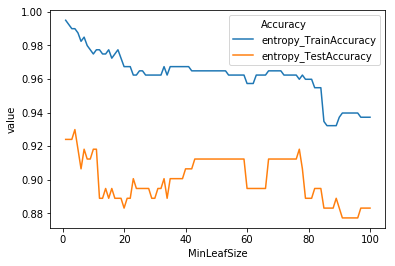

In [24]:
df_accruacy4_melt = pd.melt(df_accruacy4,id_vars=["Criterion","Depth","MinLeafSize"])
df_accruacy4_melt["Accuracy"] = df_accruacy4_melt["Criterion"]+'_'+ df_accruacy4_melt["variable"]
sns.lineplot(x="MinLeafSize", y="value", hue="Accuracy", data=df_accruacy4_melt)

##### Min leaf size 가 증가할 수록 Train의 예측력이 하향세를 보임, 
> **과적합!**  
> **최적값은 3**

## 모델 최적화 및 예측

##### 위에서 얻은 최적값을 이용하여 예측 실행

In [28]:
rf_model = RandomForestClassifier(criterion='gini',max_depth=4,min_samples_leaf=3, n_estimators=88,random_state=1234)
rf_model.fit(df_train_x_scaled,df_train_y)

df_feature_importance = pd.DataFrame()
df_feature_importance["feature"] = df_train_x.columns
df_feature_importance["importance"] = rf_model.feature_importances_
df_feature_importance.sort_values(by="importance",ascending=False)

print(rf_model.score(df_train_x_scaled,df_train_y))
print(rf_model.score(df_test_x_scaled,df_test_y))

0.9899497487437185
0.9298245614035088


##### Test 데이터 예측률 93%

### 설명변수 중요도 확인

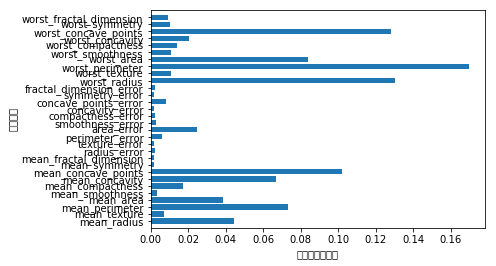

In [29]:
import matplotlib.pyplot as plt

def plot_feature_importances(model):
    n_features = df_train_x.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align="center")
    plt.yticks(np.arange(n_features),df_train_x.columns)
    plt.xlabel("설명변수중요도")
    plt.ylabel("설명변수")
    plt.ylim(-1,n_features)

plot_feature_importances(rf_model)

##### 중요도가 높은 변수들을 확인 할 수 있다.

## GridSearchCV를 이용한 최적모델 선택

#### 직접 예측했던 인자들을 GridSearchCV 를 이용하여 선택

In [37]:
from sklearn.model_selection import GridSearchCV

param_grid = {'criterion': ['gini','entropy'], 
              'min_samples_leaf':[i for i in range(2,11)],
              'max_depth':[i for i in range(2,11)],
              'n_estimators':[i for i in range(85,96)]}
model= RandomForestClassifier()

clf = GridSearchCV(model,param_grid,cv=10,scoring="accuracy")
clf.fit(df_train_x_scaled,df_train_y)

/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'criterion': ['gini', 'entropy'], 'min_samples_leaf': [2, 3, 4, 5, 6, 7, 8, 9, 10], 'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10], 'n_estimators': [85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [38]:
clf.cv_results_["mean_test_score"].shape

(1782,)

In [39]:
clf.best_params_

{'criterion': 'entropy',
 'max_depth': 10,
 'min_samples_leaf': 2,
 'n_estimators': 86}

In [45]:
clf.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=86, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [40]:
clf.best_score_

0.9748743718592965

In [47]:
clf.best_estimator_.score(df_test_x_scaled,df_test_y)

0.9239766081871345

##### GridSearchCV 를 이용한 Test 데이터 예측률 92.3%

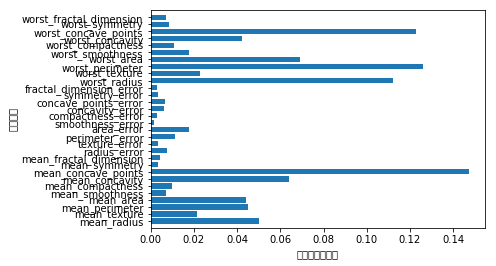

In [46]:
rf_model = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=86, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
rf_model.fit(df_train_x_scaled,df_train_y)

df_feature_importance = pd.DataFrame()
df_feature_importance["feature"] = df_train_x.columns
df_feature_importance["importance"] = rf_model.feature_importances_
df_feature_importance.sort_values(by="importance",ascending=False)

import matplotlib.pyplot as plt

def plot_feature_importances(model):
    n_features = df_train_x.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align="center")
    plt.yticks(np.arange(n_features),df_train_x.columns)
    plt.xlabel("설명변수중요도")
    plt.ylabel("설명변수")
    plt.ylim(-1,n_features)

plot_feature_importances(rf_model)

##### GridSearchCV 를 이용한 설명 변수 중요도가 기존 선택했던 것과 다른 것을 볼 수 있다.